In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.7.2.dev0+g8abf70a.d20240415


In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## Understand the layout:

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

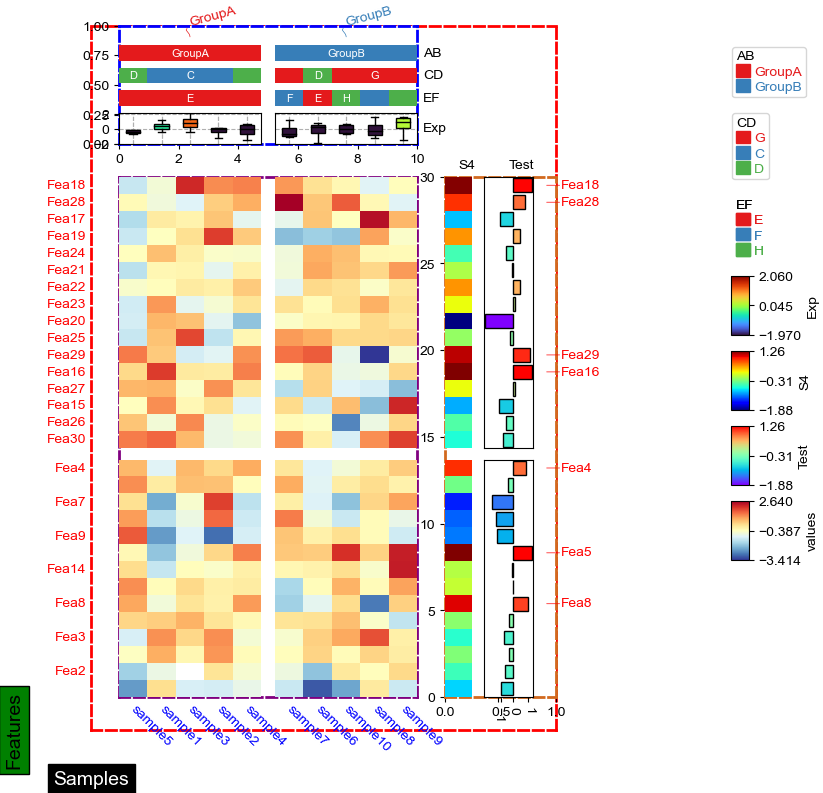

In [4]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       height=10,#add_text=True,
                       text_kws={'rotation':0,'fontsize':10,'color':'black'}),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red',relpos=(0,0.5)),
            axis=0,verbose=0,wgap=4,label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,height=5),axis=1,
            CD=anno_simple(df.CD,add_text=True,height=5),
            EF=anno_simple(df.EF,add_text=True,height=5,
                            legend_kws={'frameon':False}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            verbose=0,hgap=2) #verbose=0 will turn off the log.

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, 
            col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=5,legend_hpad=10,legend_vpad=5,
            #annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',
            cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red',pad=20),
            subplot_gap=8,
            xlabel='Samples',xlabel_kws=dict(color='white',fontsize=14,labelpad=25,position=(0,0)),
            xlabel_bbox_kws=dict(facecolor='black'),ylabel_bbox_kws=dict(facecolor='green'),
            ylabel='Features',ylabel_kws=dict(color='black',fontsize=14,labelpad=45,position=(0,0)),
) 
for ax,color in zip([cm.ax,cm.ax_heatmap,cm.ax_top,cm.ax_right],['red','purple','blue','chocolate']):
    for side in ["top", "right", "left", "bottom"]:
        ax.set_axis_on()
        # ax.yaxis.set_visible(True)
        # ax.xaxis.set_visible(True)
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color(color)
        ax.spines[side].set_linewidth(2)
        ax.spines[side].set_linestyle('--')
plt.show()

In [5]:
cm.ax.xaxis.label.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'bbox_patch': <matplotlib.patches.FancyBboxPatch at 0x7fb4d5a69fa0>,
 'children': [],
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'color': 'white',
 'figure': <Figure size 600x800 with 31 Axes>,
 'fontfamily': ['sans serif'],
 'fontname': 'Arial',
 'fontproperties': <matplotlib.font_manager.FontProperties at 0x7fb4d59faee0>,
 'fontsize': 14.0,
 'fontstyle': 'normal',
 'fontvariant': 'normal',
 'fontweight': 'normal',
 'gid': None,
 'horizontalalignment': 'center',
 'in_layout': True,
 'label': '',
 'math_fontfamily': 'dejavusans',
 'mouseover': False,
 'parse_math': True,
 'path_effects': [],
 'picker': None,
 'position': (0, 23.000000000000007),
 'rasterized': False,
 'rotation': 0.0,
 'rotation_mode': None,
 'sketch_params': None,
 'snap': None,
 'stretch': 'normal',
 'text': 'Samples',
 'tightbbox': Bbox([[37.125, 5.000000000000007], [112.875, 23.000000000000007]]),
 'transform': <matplotlib.transforms.BlendedAf

In [6]:
cm.ax.xaxis.label.get_bbox_patch().properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'antialiased': True,
 'bbox': Bbox([[0.0, 0.0], [75.75, 18.0]]),
 'boxstyle': <matplotlib.patches.BoxStyle.Square at 0x7fb4d5f01b20>,
 'capstyle': 'butt',
 'children': [],
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'data_transform': <matplotlib.transforms.Affine2D at 0x7fb4d69d2430>,
 'edgecolor': (0.0, 0.0, 0.0, 1.0),
 'extents': Bbox([[47.54166666666667, -0.6388888888888813], [134.56944444444446, 28.638888888888896]]),
 'facecolor': (0.0, 0.0, 0.0, 1.0),
 'figure': None,
 'fill': True,
 'gid': None,
 'hatch': None,
 'height': 18.0,
 'in_layout': True,
 'joinstyle': 'miter',
 'label': '',
 'linestyle': 'solid',
 'linewidth': 1.0,
 'mouseover': False,
 'mutation_aspect': 1,
 'mutation_scale': 19.444444444444443,
 'patch_transform': <matplotlib.transforms.IdentityTransform at 0x7fb4d59874c0>,
 'path': Path(array([[-5.63888889, -5.63888889],
        [81.38888889, -5.63888889],
        [81.38888889, 23.63888889],
   

## Test dendrogram

In [7]:
from scipy.cluster import hierarchy

In [8]:
Index= ['aaa','bbb','ccc','ddd','eee']
Cols = ['A', 'B', 'C','D']
df = pd.DataFrame(abs(np.random.randn(5, 4)), index= Index, columns=Cols)
df

,A,B,C,D
aaa,1.162311,1.311971,0.284706,1.206202
bbb,0.218931,0.177535,1.739165,0.002853
ccc,0.621873,0.050180,1.301119,0.407408
ddd,0.235829,0.085177,1.837528,1.094667
eee,1.052342,1.310365,0.430963,1.227427


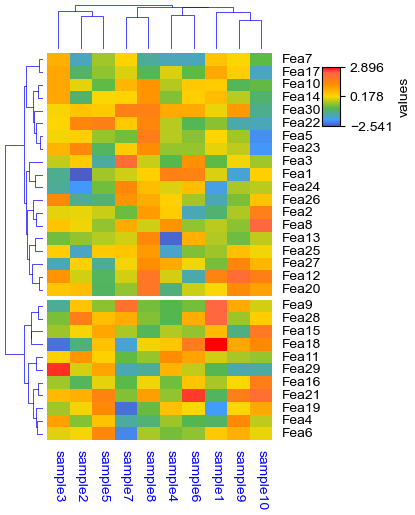

In [9]:
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]

df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap.fillna(0),
        col_cluster=True,row_cluster=True,
        # col_split=df.AB,
        row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,col_dendrogram=True,
        show_rownames=True,show_colnames=True,
        row_names_side='right',yticklabels=True,
        tree_kws=dict(colors='blue'),verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()

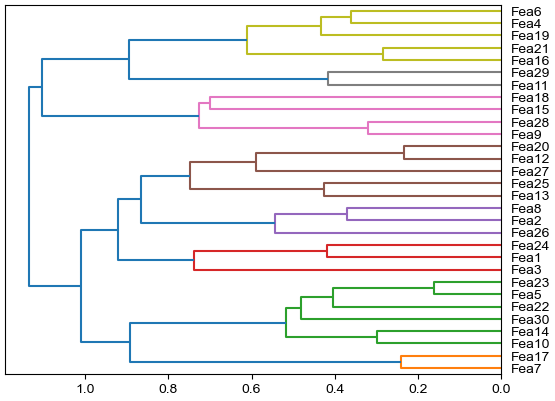

{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [45.0, 45.0, 62.5, 62.5], [30.0, 30.0, 53.75, 53.75], [10.0, 10.0, 41.875, 41.875], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [145.0, 145.0, 155.0, 155.0], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [150.0, 150.0, 172.5, 172.5], [122.5, 122.5, 161.25, 161.25], [92.5, 92.5, 141.875, 141.875], [25.9375, 25.9375, 117.1875, 117.1875], [195.0, 195.0, 205.0, 205.0], [215.0, 215.0, 225.0, 225.0], [200.0, 200.0, 220.0, 220.0], [235.0, 235.0, 245.0, 245.0], [255.0, 255.0, 265.0, 265.0], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [260.0, 260.0, 282.5, 282.5], [240.0, 240.0, 271.25, 271.25], [210.0, 210.0, 255.625, 255.625], [71.5625, 71.5625, 232.8125, 232.8125]], 'dcoord': [[0.0, 0.24018272565118937, 0.24018272565118937, 0.0], [0.0, 0.2976427736510533, 0.2976427736510533, 0.0]

In [10]:
Z = hierarchy.linkage(df_heatmap.fillna(0), metric='correlation',method='average')

# hierarchy.dendrogram(Z, labels=df_heatmap.index)
# plt.show()

dend=hierarchy.dendrogram(Z, orientation="left", labels=df_heatmap.index)
plt.show()
print(dend)

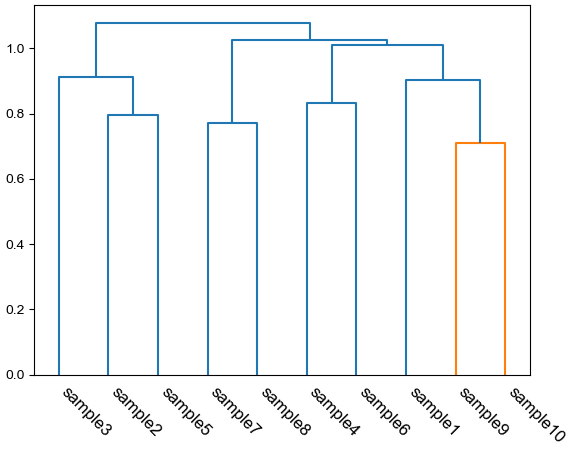

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [55.0, 55.0, 65.0, 65.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [60.0, 60.0, 82.5, 82.5], [40.0, 40.0, 71.25, 71.25], [12.5, 12.5, 55.625, 55.625]], 'dcoord': [[0.0, 0.7960382998871358, 0.7960382998871358, 0.0], [0.0, 0.9126695845557546, 0.9126695845557546, 0.7960382998871358], [0.0, 0.771173177951199, 0.771173177951199, 0.0], [0.0, 0.8323681329461097, 0.8323681329461097, 0.0], [0.0, 0.7089135989123398, 0.7089135989123398, 0.0], [0.0, 0.9040539875728044, 0.9040539875728044, 0.7089135989123398], [0.8323681329461097, 1.0100102254434757, 1.0100102254434757, 0.9040539875728044], [0.771173177951199, 1.0269941172211454, 1.0269941172211454, 1.0100102254434757], [0.9126695845557546, 1.0792948483578186, 1.0792948483578186, 1.0269941172211454]], 'ivl': ['sample3', 'sample2', 'sample5', 'sample7', 'sample8', 'sample4', 'sample6', 'sample1', 'sample9', 'sample10'], 'leaves': [2, 1, 4, 6, 7, 3, 5, 

In [11]:
Z = hierarchy.linkage(df_heatmap.fillna(0).T, metric='correlation',method='average')


dend=hierarchy.dendrogram(Z, orientation="top", labels=df_heatmap.columns)
ax=plt.gca()
plt.xticks(rotation=-45, ha='left')
# ax.tick_params(axis='x', labelrotation=-90)
plt.show()
print(dend)

## anno_label

In [12]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

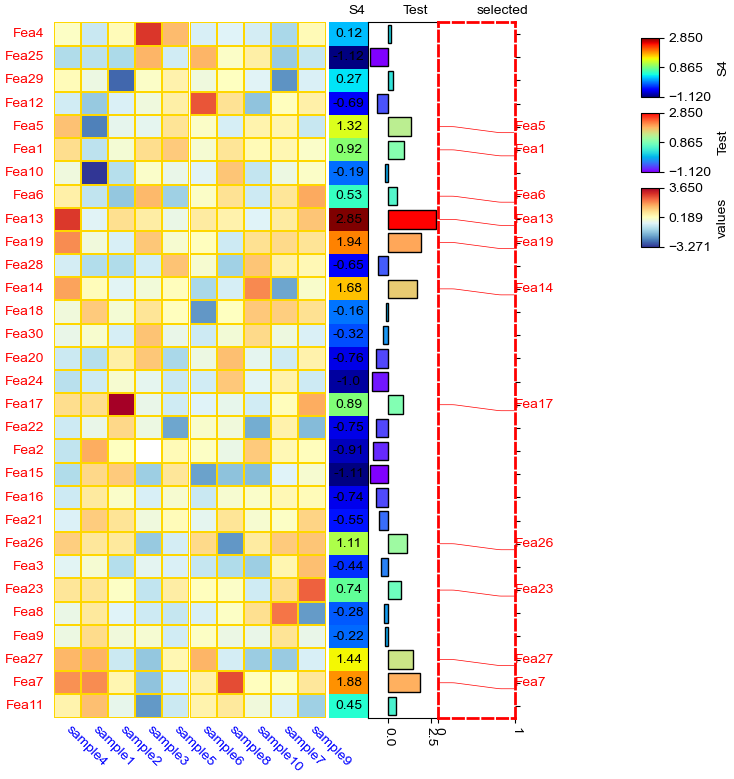

In [13]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       add_text=True,height=10,
                       text_kws={'rotation':0,'fontsize':10,'color':'black'}),
            # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
            #                  height=10),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red',height=20,extend=True),
            axis=0,verbose=0,#wgap=4,
            label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap,right_annotation=row_ha,
            col_split=df.AB,
            # row_split=df_rows.XY, 
            #col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
) 
ax=cm.right_annotation.annotations[2].ax
for side in ["top", "right", "left", "bottom"]:
    ax.set_axis_on()
    ax.spines[side].set_visible(True)
    ax.spines[side].set_color('red')
    ax.spines[side].set_linewidth(2)
    ax.spines[side].set_linestyle('--')
ax.tick_params(axis="y", which="both", bottom=True, labelbottom=True,left=False,labelleft=False,right=True,labelright=True)
ax.yaxis.tick_right()
ax.yaxis.set_visible(True)
plt.show()

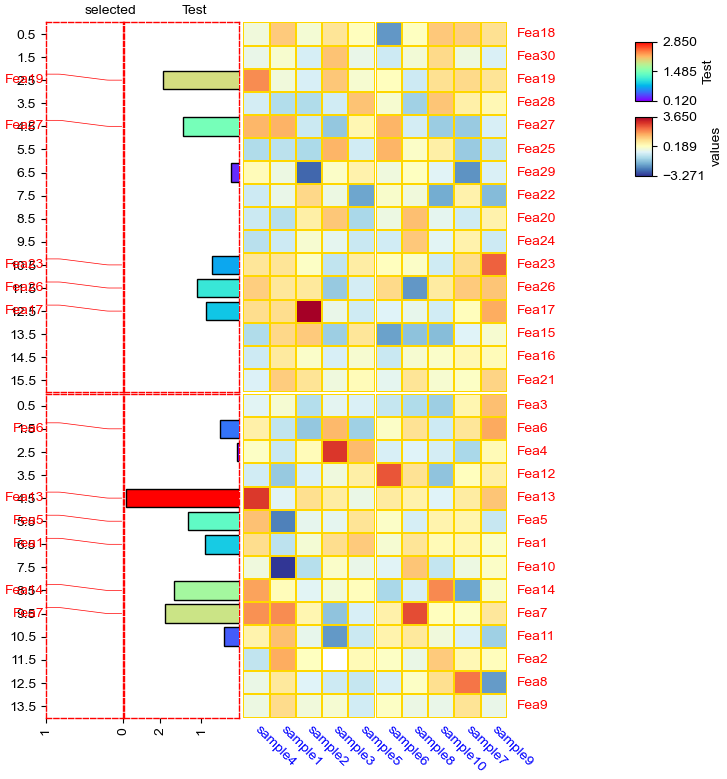

In [14]:
row_ha = HeatmapAnnotation(
            selected=anno_label(df_rows,colors='red',height=20),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2) if x > 0 else None),
                        height=30,cmap='rainbow'),
            axis=0,verbose=0,#wgap=4,
            label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, left_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, 
            #col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,row_names_side='right',
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
) 
for ax in cm.left_annotation.axes.flatten():
    for side in ["top", "right", "left", "bottom"]:
        ax.set_axis_on()
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color('red')
        ax.spines[side].set_linewidth(1)
        ax.spines[side].set_linestyle('--')
plt.show()

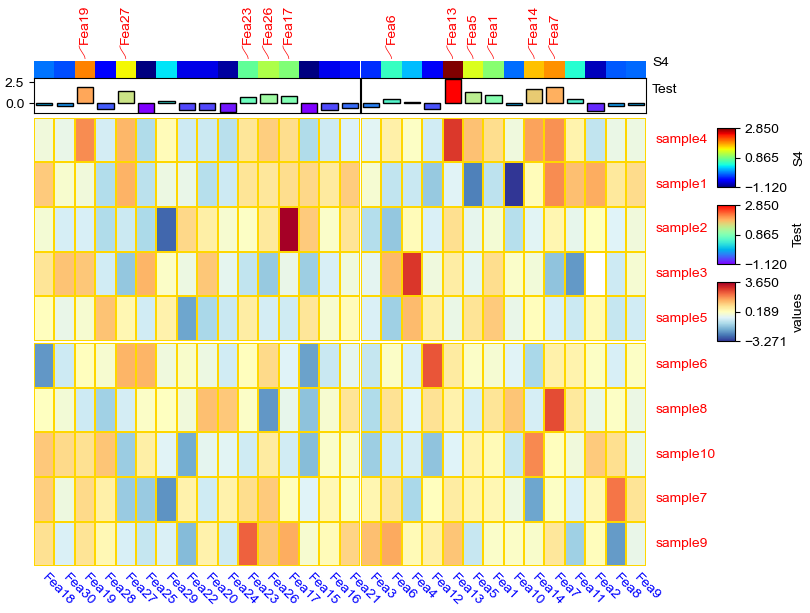

In [15]:
row_ha = HeatmapAnnotation(
            selected=anno_label(df_rows,colors='red',rotation=90),
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       height=4),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=8,cmap='rainbow'),
            axis=1,verbose=0,#wgap=4,
            label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

plt.figure(figsize=(8, 6))
cm = ClusterMapPlotter(
            data=df_heatmap.T, top_annotation=row_ha,
            row_split=df.AB,
            col_split=df_rows.XY, 
            #col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,row_names_side='right',
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
) 
plt.show()

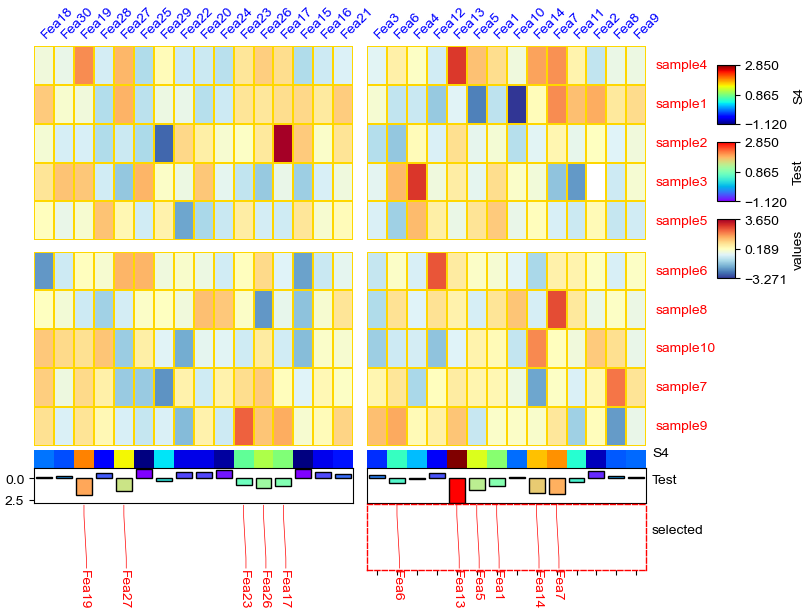

In [16]:
col_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       height=4),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=8,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red',relpos=(0.7,1),height=15,extend=True),
            axis=1,verbose=0,#wgap=4,
            label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

plt.figure(figsize=(8, 6))
cm = ClusterMapPlotter(
            data=df_heatmap.T, bottom_annotation=col_ha,
            row_split=df.AB,
            col_split=df_rows.XY, 
            col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,row_names_side='right',
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
) 
ax=cm.bottom_annotation.annotations[2].ax
for side in ["top", "right", "left", "bottom"]:
    ax.set_axis_on()
    ax.spines[side].set_visible(True)
    ax.spines[side].set_color('red')
    ax.spines[side].set_linewidth(1)
    ax.spines[side].set_linestyle('--')
plt.show()

## anno_img

(256, 256, 3)
(3, 256, 256)


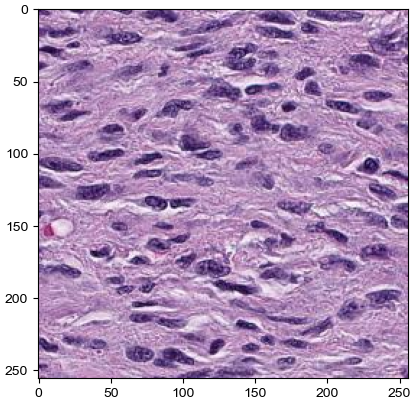

In [17]:
import matplotlib.image as mpimg
img=mpimg.imread("1.jpeg")
# img=mpimg.imread("2.png")
plt.imshow(img)
print(img.shape)
print(img.T.shape)

199 399
(199, 399, 3)
(3, 399, 199)


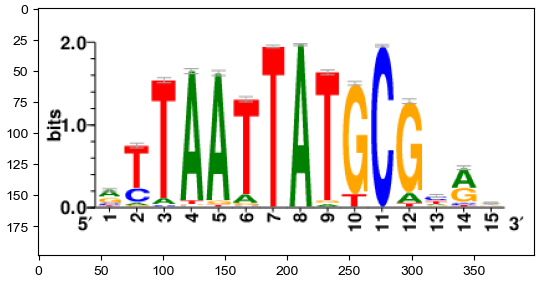

In [18]:
import PIL
import requests
from io import BytesIO
url="https://motifcollections.aertslab.org/v10nr_clust/logos/taipale_cyt_meth__POU5F1_NYTAATTATGCGNRN_FL_meth_repr.png"
response = requests.get(url)
# Open the image from bytes
image = PIL.Image.open(BytesIO(response.content))
# image=PIL.ImageOps.invert(image)
if image.mode != 'RGBA':
    image = image.convert('RGB')
print(image.height,image.width)
image = np.array(image)
plt.imshow(image)
print(image.shape)
print(image.T.shape)

### extent

(199, 399, 4)
(4, 399, 199)


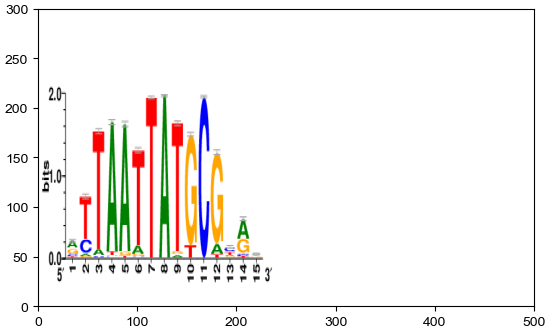

In [19]:
img=mpimg.imread("2.png")
plt.xlim(0,500)
plt.ylim(0,300)
plt.imshow(img,extent=[0,240,0,250])
ax=plt.gca()
# ax.invert_yaxis()
print(img.shape)
print(img.T.shape)

Direction of imshow: top -> bottom, left -> right </br>
The first dimension (height) is Y, the second dimension is X (width)

In [20]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
df_img = pd.DataFrame(
    ['https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/121px-Python-logo-notext.svg.png',
   'https://motifcollections.aertslab.org/v10nr_clust/logos/metacluster_135.7.png',
   'https://cdn3.iconfinder.com/data/icons/family-member-flat-happy-family-day/512/Brother-512.png',
   'https://cdn3.iconfinder.com/data/icons/family-member-flat-happy-family-day/512/Sister-512.png',
   'https://img.freepik.com/free-vector/sticker-design-with-cute-mouse-isolated_1308-59360.jpg',
   'https://motifcollections.aertslab.org/v10nr_clust/logos/metacluster_131.8.png',
   'https://img.freepik.com/premium-vector/vector-illustration-gorilla-isolated-white-background-cartoon-style_1151-66575.jpg',
  "2.png",'1.jpeg',
  'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/121px-Python-logo-notext.svg.png'], 
    columns=['path'])
# df_img = pd.DataFrame(
#     ["2.png",'1.jpeg']*5, columns=['path'])
df_img.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]

Starting plotting HeatmapAnnotations


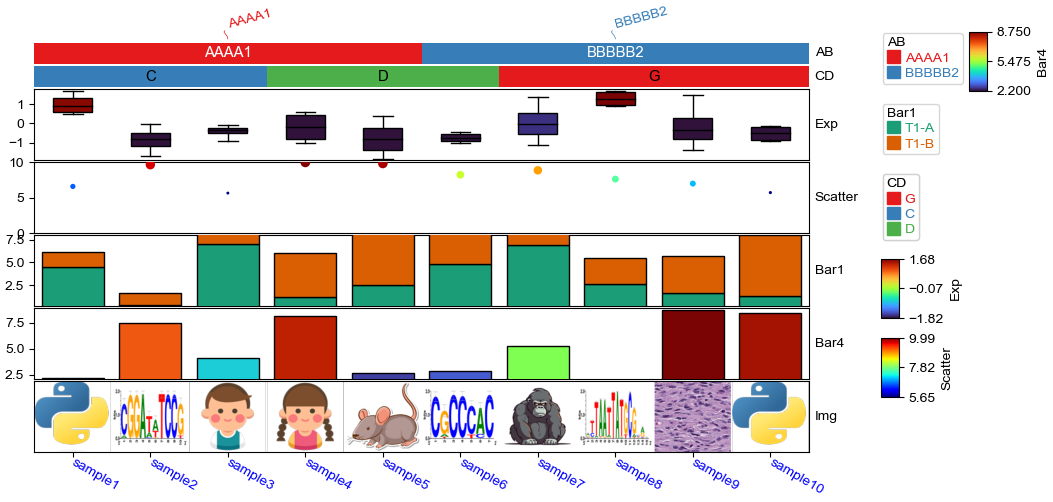

In [21]:
plt.figure(figsize=(10, 5))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Img=anno_img(df_img.path),
            plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

Starting plotting HeatmapAnnotations


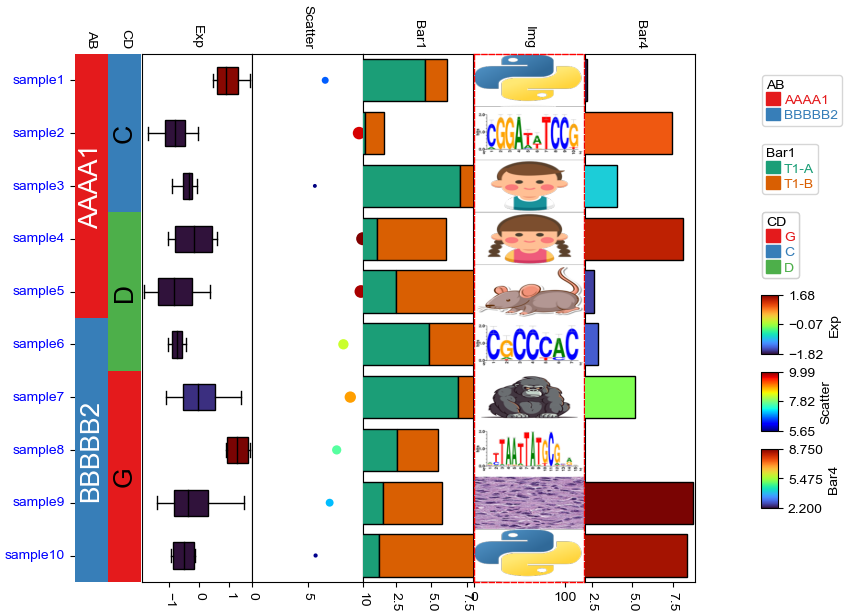

In [22]:
plt.figure(figsize=(8, 6))
col_ha = HeatmapAnnotation(
            AB=anno_simple(df.AB,add_text=True,legend=True),
            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Img=anno_img(df_img.path),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            plot=True,legend=True,legend_gap=5,hgap=0.5, axis=0,orientation='right',legend_hpad=15)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'}) #rotation

ax=col_ha.annotations[-2].ax
ax.xaxis.set_visible(True) # show ticks
ax.tick_params(
    axis="x", which="both", bottom=True, labelbottom=True
)
for side in ["top", "right", "left", "bottom"]:
    ax.set_axis_on()
    ax.spines[side].set_visible(True)
    ax.spines[side].set_color('red')
    ax.spines[side].set_linewidth(1)
    ax.spines[side].set_linestyle('--')
plt.show()

Starting plotting HeatmapAnnotations


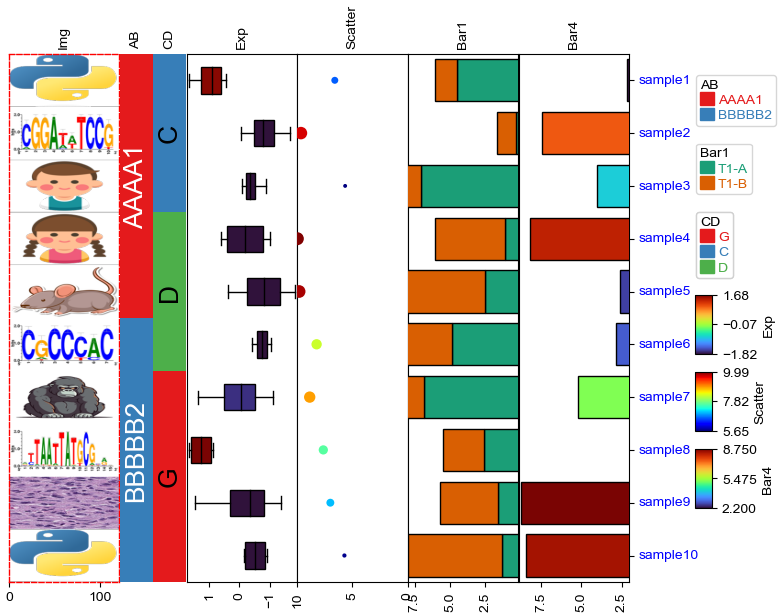

In [23]:
plt.figure(figsize=(8, 6))
col_ha = HeatmapAnnotation(
            Img=anno_img(df_img.path),
            AB=anno_simple(df.AB,add_text=True,legend=True),
            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            plot=True,legend=True,legend_gap=5,hgap=0.5, axis=0,orientation='left',legend_hpad=15)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'}) #rotation
ax=col_ha.annotations[0].ax
ax.xaxis.set_visible(True) # show ticks
ax.tick_params(
    axis="x", which="both", bottom=True, labelbottom=True
)
for side in ["top", "right", "left", "bottom"]:
    ax.set_axis_on()
    ax.spines[side].set_visible(True)
    ax.spines[side].set_color('red')
    ax.spines[side].set_linewidth(1)
    ax.spines[side].set_linestyle('--')
plt.show()

## Color palette design

In [269]:
import matplotlib.pyplot as plt
import colorsys
import numpy as np
from matplotlib import colors as mcolors
named_colors=mcolors.CSS4_COLORS
named_colors.update(mcolors.BASE_COLORS) #kes is color string, values are hex
# named_colors.update(mcolors.TABLEAU_COLORS)
named_colors.update(mcolors.CSS4_COLORS)
for k in named_colors:
    if isinstance(named_colors[k],tuple):
        named_colors[k]=mcolors.to_hex(named_colors[k])

def identify_color_format(color):
    if color in named_colors:
        return 'named_color'
    # Check if the color is in HEX format (e.g., #RRGGBB or #RGB)
    elif isinstance(color, str) and color.startswith('#'):
        if len(color) == 7 or len(color) == 4:
            return 'HEX'
    # Check if the color is in RGB format (tuple of 3 integers/floats)
    elif isinstance(color, tuple) and len(color) == 3:
        if all(isinstance(val, int) and 0 <= val <= 255 for val in color):
            return 'RGB (integer)'
        elif all(isinstance(val, float) and 0 <= val <= 1 for val in color):
            return 'RGB (float)'
    # Check if the color is in HLS format (tuple of 3 floats)
    elif isinstance(color, tuple) and len(color) == 3:
        h, l, s = color
        if (isinstance(h, float) and 0 <= h <= 1) or (isinstance(h, int) and 0 <= h <= 360):
            if isinstance(l, float) and 0 <= l <= 1 and isinstance(s, float) and 0 <= s <= 1:
                return 'HLS'
    return 'Unknown'


def generate_similar_colors(base_color, num_colors=5, h_delta=1/6, l_delta=0.4, s_delta=0.4,
                           l_min=0.2,l_max=0.8,s_min=0.2,s_max=0.8):
    fmt=identify_color_format(base_color)
    if not fmt.startswith('RGB'):
        base_color=mcolors.to_rgb(base_color)
    
    # Convert the base RGB color to HLS (Hue, Lightness, Saturation)
    r, g, b = base_color
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    # Generate a list of similar colors by varying the hue
    # The hue determines the "base" color:
    #     0 or 1 (or 360 degrees) = Red
    #     1/6 (or 60 degrees) = Yellow
    #     2/6 (or 120 degrees) = Green
    #     3/6 (or 180 degrees) = Cyan
    #     4/6 (or 240 degrees) = Blue
    #     5/6 (or 300 degrees) = Magenta
    #     Back to Red as it cycles around the wheel.
    colors = []
    hues=np.linspace(max(h-h_delta,0),min(h+h_delta,1),num_colors)
    lightness=np.linspace(max(l-l_delta,l_min),min(l+l_delta,l_max),num_colors)
    saturations=np.linspace(max(s-s_delta,s_min),min(s+s_delta,s_max),num_colors)
    for h1,l1,s1 in zip(hues,lightness,saturations):
        new_color = colorsys.hls_to_rgb(h1, l1, s1)
        colors.append(new_color)
    return colors

def interpolate_colors(color1, color2, num_colors,fmt='rgb'):
    if fmt=='hls':
        color1=colorsys.hls_to_rgb(*color1)
        color2=colorsys.hls_to_rgb(*color2)
    elif fmt!='rgb':
        color1=mcolors.to_rgb(color1)
        color2=mcolors.to_rgb(color2)
    # Convert colors to numpy arrays for easy interpolation
    color1 = np.array(color1)
    color2 = np.array(color2)
    
    # Generate a linear interpolation between the two colors
    colors = [tuple(color1 + (color2 - color1) * i / (num_colors - 1)) for i in range(num_colors)]
    
    return colors

def generate_quantive_colors(color,n=5,white=(0.9,0.9,0.9),black=(0.3,0.3,0.3),ret_fmt='hex'):
    fmt=identify_color_format(color)
    if not fmt.startswith('RGB'):
        color=mcolors.to_rgb(color)
    light_colors=interpolate_colors(white,color,n//2 + 2)[1:-1] # from white to color
    dark_colors=interpolate_colors(color,black,n//2 + 2)[1:-1] # from color to black;white=(1,1,1),black=(0,0,0)
    if len(light_colors)+len(dark_colors) == n:
        results=light_colors+dark_colors
    else:
        results=light_colors+[color]+dark_colors
    if ret_fmt=='rgb':
        return results
    elif ret_fmt=='hex':
        return [mcolors.to_hex(c) for c in results]

In [236]:
# Step 3: Plot the generated colors
def plot_colors(colors):
    fig, ax = plt.subplots(1, figsize=(10, 1), subplot_kw=dict(xticks=[], yticks=[]))
    for i, color in enumerate(colors):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    plt.xlim(0, len(colors))
    plt.show()

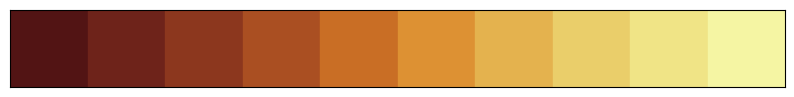

In [238]:
similar_colors = generate_similar_colors('red', num_colors=10) ## Light blue
# Plot the generated similar colors
plot_colors(similar_colors)

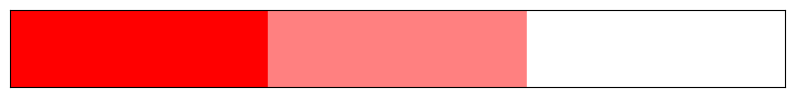

In [242]:
similar_colors=interpolate_colors('red','white',3,fmt='named_color')
plot_colors(similar_colors)

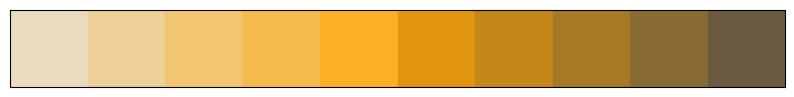

In [270]:
similar_colors=generate_quantive_colors('orange',n=10)
plot_colors(similar_colors)

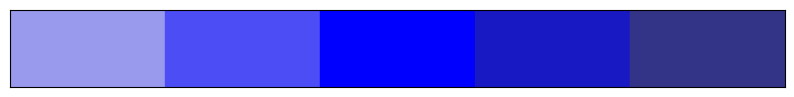

In [271]:
similar_colors=generate_quantive_colors('blue',n=5)
plot_colors(similar_colors)

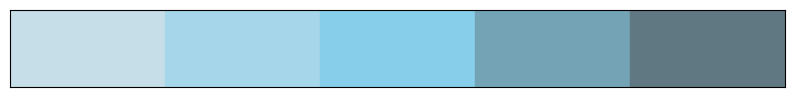

In [272]:
similar_colors=generate_quantive_colors('skyblue',n=5)
plot_colors(similar_colors)

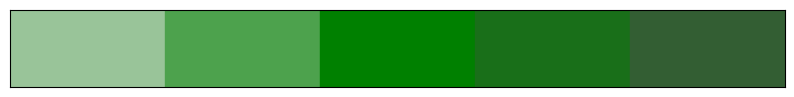

In [273]:
similar_colors=generate_quantive_colors('green',n=5)
plot_colors(similar_colors)

In [274]:
similar_colors

['#99c499', '#4da24d', '#008000', '#196f19', '#335e33']

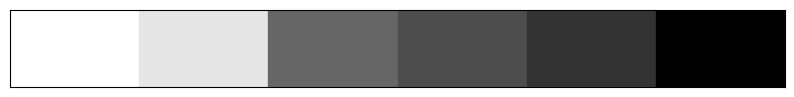

In [263]:
plot_colors([(1,1,1),(0.9,0.9,0.9),(0.4,0.4,0.4),(0.3,0.3,0.3),(0.2,0.2,0.2),(0,0,0)])

In [130]:
mcolors.to_rgb(())

(1.0, 0.0, 0.0)

In [247]:
mcolors.to_rgb('black')

(0.0, 0.0, 0.0)

In [128]:
colorsys.rgb_to_hls(*mcolors.to_rgb('red'))

(0.0, 0.5, 1.0)

In [129]:
colorsys.rgb_to_hls(*mcolors.to_rgb('pink'))

(0.9708994708994709, 0.8764705882352941, 1.0)

In [267]:
mcolors.to_hex((0.0, 0.0, 0.0))

'#000000'